# 1. Dados

In [1]:
import pandas as pd
import os

path = 'data/raw'

dados_antigos = pd.read_csv(os.path.join(path, 'pgm-dataset.csv'), dtype=str)
dados_novos_janeiro_maio = pd.read_csv(os.path.join(path, 'novo_dataframe_com_metadados.csv'), dtype=str)

# Tratando os dados novos
dados_novos_janeiro_maio['data_aviso'] = dados_novos_janeiro_maio['data_aviso'].apply(lambda x: x.split('.')[0])

# Tratando os dados antigos
dados_antigos_filtered = dados_antigos[['idAviso', 'dataAviso', 'teorTexto', 'assuntos', 'classeProcesso', 'orgaoJulgador', 'setorDestino']].copy()
dados_antigos_filtered.rename(columns={
    'idAviso':'id_aviso',
    'dataAviso':'data_aviso',
    'teorTexto': 'teor_texto',
    'classeProcesso':'cod_classe_processual',
    'orgaoJulgador':'orgao_julgador',
    'setorDestino':'setor_destino'
}, inplace=True)

## 1.1 - Merge dos DataFrames

In [2]:
print(f'Shape dados antigos: {dados_antigos_filtered.shape}')
print(f'Shape dados novos: {dados_novos_janeiro_maio.shape}')

df_merged = pd.concat([dados_antigos_filtered, dados_novos_janeiro_maio]).reset_index(drop=True)

# Filtrando apenas as linhas com setor_destino válido
df_merged = df_merged[df_merged['setor_destino'].notna()].copy()

df_merged.sort_values(by='data_aviso')

Shape dados antigos: (15942, 7)
Shape dados novos: (34903, 8)


,id_aviso,data_aviso,teor_texto,assuntos,cod_classe_processual,orgao_julgador,setor_destino,id_processo
12745,2482609,2024-04-01 14:02:27,Poder Judiciário do Rio Grande do NorteTerceir...,5951,198,Gab. da Vice-Presidência no Pleno,Procuradoria Fiscal,NaN
12744,2482461,2024-04-01 14:02:35,Poder Judiciário do Rio Grande do NorteTerceir...,10536;5952,1116,2ª Vara de Execução Fiscal e Tributária de Natal,Procuradoria Fiscal,NaN
12743,2482428,2024-04-01 14:03:44,Poder Judiciário do Rio Grande do NorteTerceir...,5946,198,Gab. Des. Vivaldo Pinheiro na Câmara Cível,Procuradoria Fiscal,NaN
12752,2484815,2024-04-01 23:19:19,Poder Judiciário do Rio Grande do NortePrimeir...,5952,7,6ª Vara de Execução Fiscal e Tributária de Natal,Procuradoria Fiscal,NaN
12750,2484537,2024-04-01 23:19:23,Poder Judiciário do Rio Grande do NortePrimeir...,9178,1118,4ª Vara de Execução Fiscal e Tributária de Natal,CHEFIA FISCAL,NaN
...,...,...,...,...,...,...,...,...
30804,23210879,2025-05-19 03:00:19,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,9517;10706,12078,1º Juizado da Fazenda Pública da Comarca de Natal,DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE,08132991120238205001
23981,23211840,2025-05-19 03:00:19,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,10536;10395,7,5ª Vara de Execução Fiscal e Tributária de Natal,Chefia Meio Ambiente,08739536120238205001
21118,23213095,2025-05-19 03:00:19,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,5951,1116,3ª Vara de Execução Fiscal e Tributária de Natal,APOIO FISCAL,08032331620168205001
17995,23217735,2025-05-19 03:00:19,PODER\nJUDICIÁRIO DO ESTADO DO RIO GRANDE DO N...,5988,1118,6ª Vara de Execução Fiscal e Tributária de Natal,Procuradoria Fiscal,08809477120248205001


## 1.2 - Filtrando os dados baseado no setor_destino

In [3]:
# Corrigindo erros
df_merged['setor_destino'] = df_merged['setor_destino'].apply(lambda x: x.upper())
df_merged.replace(
    {
        'DEPARTAMENTO DE C�LCULOS E CONTABILIDADE': 'DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE',
        'PROCURADORIA DA SA�DE': 'PROCURADORIA DA SAÚDE',
    },
    inplace=True
)

In [4]:
# Filtrando classes
classes = [
    'PROCURADORIA JUDICIAL',
    'CHEFIA JUDICIAL',
    'PROCURADORIA ADMINISTRATIVA',
    'CHEFIA ADMINISTRATIVA',
    'PROCURADORIA FISCAL',
    'APOIO FISCAL',
    'PROCURADORIA DO MEIO AMBIENTE',
    'CHEFIA MEIO AMBIENTE',
    'PROCURADORIA PATRIMONIAL',
    'CHEFIA PATRIMONIAL',
    'PROCURADORIA DA SAÚDE',
    'DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE',
    'REQUISITÓRIO DE PAGAMENTO - CONTABILIDADE'
]

df_filtrado = df_merged[df_merged['setor_destino'].isin(classes)].copy()

print(f'Essa filtragem corresponde a cerca de {len(df_filtrado)/len(df_merged)*100:.2f}% do dataset original')

Essa filtragem corresponde a cerca de 99.53% do dataset original


Juntando classes como:

* Chefia Adminsitrativa + Procuradoria Administrativa
* Chefia Judicial + Procuradoria Judicial
* Chefia Meio Ambiente + Procuradoria do Meio Ambiente
* Chefia Patrimonial + Procuradoria Patrimonial
* Departamento de Cálculos e Contabilidade + Requisitório de Pagamentos - Contabilidade

In [5]:
swap_dict = {
    'CHEFIA ADMINISTRATIVA': 'PROCURADORIA ADMINISTRATIVA',
    'CHEFIA JUDICIAL': 'PROCURADORIA JUDICIAL',
    'CHEFIA MEIO AMBIENTE': 'PROCURADORIA DO MEIO AMBIENTE',
    'CHEFIA PATRIMONIAL': 'PROCURADORIA PATRIMONIAL',
    'REQUISITÓRIO DE PAGAMENTO - CONTABILIDADE': 'DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE'
}

# Substituindo valores acima
df_filtrado.replace(swap_dict, inplace=True)

print(f'Shape DF: {df_filtrado.shape}')
df_filtrado['setor_destino'].value_counts(normalize=True)

Shape DF: (50023, 8)


setor_destino
PROCURADORIA ADMINISTRATIVA                 0.353437
APOIO FISCAL                                0.287788
PROCURADORIA FISCAL                         0.134338
PROCURADORIA JUDICIAL                       0.094297
DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE    0.079623
PROCURADORIA DA SAÚDE                       0.036963
PROCURADORIA DO MEIO AMBIENTE               0.007597
PROCURADORIA PATRIMONIAL                    0.005957
Name: proportion, dtype: float64

## 1.3 - Análise de Duplicatas

In [6]:
X, y = df_filtrado[['teor_texto', 'assuntos', 'cod_classe_processual', 'orgao_julgador']].copy(), df_filtrado['setor_destino'].copy()

df_duplicate_analysis = X.copy()
df_duplicate_analysis['setor_destino'] = y

full_duplicated = df_duplicate_analysis.duplicated().sum()
partial_duplicated = X.duplicated().sum()

print(f'Considerando um DataFrame COM o target nós temos {full_duplicated} duplicatas')
print(f'Considerando um DataFrame SEM o target nós temos {partial_duplicated} duplicatas')
print(f'Isso significa que, ANTES DE QUALQUER PRÉ PROCESSAMENTO, temos {partial_duplicated - full_duplicated} dados iguais com targets diferentes')

Considerando um DataFrame COM o target nós temos 1585 duplicatas
Considerando um DataFrame SEM o target nós temos 1613 duplicatas
Isso significa que, ANTES DE QUALQUER PRÉ PROCESSAMENTO, temos 28 dados iguais com targets diferentes


In [7]:
col_features = ['teor_texto', 'assuntos', 'cod_classe_processual', 'orgao_julgador']

# Localizar conflitos (mesmos dados com classes de destino diferentes)
conflicts = (
    df_duplicate_analysis.groupby(col_features)['setor_destino']
    .nunique()
    .reset_index()
    .query('setor_destino > 1')
)

print(f'Encontrados {len(conflicts)} texto conflitantes.')

Encontrados 28 texto conflitantes.


In [8]:
conflict_classes = (
    df_duplicate_analysis.groupby(col_features)['setor_destino']
    .unique()
    .reset_index()
    .merge(conflicts[col_features], on=col_features)
)

conflict_classes.head(10)

,teor_texto,assuntos,cod_classe_processual,orgao_julgador,setor_destino
0,%PDF-1.7\n%ææææ\n1 0 obj\n<>/Metadata 48 0 R/V...,5951,1116,6ª Vara de Execução Fiscal e Tributária de Natal,"[PROCURADORIA FISCAL, APOIO FISCAL]"
1,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,10536;5952,1116,2ª Vara de Execução Fiscal e Tributária de Natal,"[PROCURADORIA FISCAL, APOIO FISCAL]"
2,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,10536;5952,1116,6ª Vara de Execução Fiscal e Tributária de Natal,"[PROCURADORIA FISCAL, APOIO FISCAL]"
3,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,10536;5952,1116,2ª Vara de Execução Fiscal e Tributária de Natal,"[PROCURADORIA FISCAL, APOIO FISCAL]"
4,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,9517,12078,4º Juizado da Fazenda Pública da Comarca de Natal,"[PROCURADORIA ADMINISTRATIVA, DEPARTAMENTO DE ..."
5,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,10706,12078,1ª Vara da Fazenda Pública da Comarca de Natal,"[PROCURADORIA ADMINISTRATIVA, DEPARTAMENTO DE ..."
6,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,10536;5952,1116,1ª Vara de Execução Fiscal e Tributária de Natal,"[APOIO FISCAL, PROCURADORIA FISCAL]"
7,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,9517;10706,12078,1º Juizado da Fazenda Pública da Comarca de Natal,"[DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE, PRO..."
8,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,10536;5952,1116,2ª Vara de Execução Fiscal e Tributária de Natal,"[APOIO FISCAL, PROCURADORIA FISCAL]"
9,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,10536;5952,1116,4ª Vara de Execução Fiscal e Tributária de Natal,"[APOIO FISCAL, PROCURADORIA FISCAL]"


In [9]:
from itertools import combinations
import pandas as pd

confusion_pairs = []

for classes in conflict_classes["setor_destino"]:
    for pair in combinations(classes, 2):
        confusion_pairs.append(tuple(sorted(pair)))

# Conta quantas vezes cada par de classes conflitou
confusion_df = pd.Series(confusion_pairs).value_counts().reset_index()
confusion_df.columns = ["par_classes", "qtd_conflitos"]

confusion_df.head(10)

,par_classes,qtd_conflitos
0,"(DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE, PRO...",16
1,"(APOIO FISCAL, PROCURADORIA FISCAL)",10
2,"(PROCURADORIA ADMINISTRATIVA, PROCURADORIA JUD...",2


In [10]:
# Excluindo registros conflitantes

# Identificar as combinações conflitantes
conflict_keys = conflict_classes[col_features]

# Transformar em tuplas para facilitar comparação
conflict_keys_set = set([tuple(row) for row in conflict_keys.values])

# Criar chave para df original
df_duplicate_analysis["key"] = list(zip(
    df_duplicate_analysis["teor_texto"], 
    df_duplicate_analysis["assuntos"], 
    df_duplicate_analysis["cod_classe_processual"], 
    df_duplicate_analysis["orgao_julgador"]
))

# Remover os conflitos
df_duplicate_analysis_filtered = df_duplicate_analysis[~df_duplicate_analysis["key"].isin(conflict_keys_set)].drop(columns=["key"])

X_filtered = df_duplicate_analysis_filtered.drop(columns=["setor_destino"])
y_filtered = df_duplicate_analysis_filtered["setor_destino"]

print(f"Tamanho final após remoção: {len(df_duplicate_analysis_filtered)} registros")

Tamanho final após remoção: 49957 registros


# 2. Separação dos dados

In [11]:
from sklearn.model_selection import train_test_split

#X, y = df_filtrado[['teor_texto', 'assuntos', 'cod_classe_processual', 'orgao_julgador']].copy(), df_filtrado['setor_destino'].copy()
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, stratify=y_filtered, random_state=42)

print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')


Train shape: (39965, 4)
Test shape: (9992, 4)


# 3. Pré-processamentos

### 3.1 - Orgão Julgador

In [12]:
import re

def preprocessa_orgao_julgador(text: str) -> str:
    
    if not text or not isinstance(text, str): # Checa se é None
        return text
    
    patterns_to_remove = [
        r'\s+da Comarca.*',
        #r'\s+de Natal',
        r'\d{1,2}[ºª]\s',
    ]

    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    return text

X_train['orgao_julgador'] = X_train['orgao_julgador'].apply(preprocessa_orgao_julgador)
X_test['orgao_julgador'] = X_test['orgao_julgador'].apply(preprocessa_orgao_julgador)

### 3.2 - Teor Texto

In [13]:
def preprocessa_teor_texto(text: str) -> str:
    """
    Remove cabeçalho (palavras-chave do topo) e rodapé (Natal/RN com variações)
    do 'text' e retorna o resultado em minúsculas.
    - A detecção do cabeçalho é *sensível a maiúsculas/minúsculas* (como no seu código).
    - A detecção do rodapé é *case-insensitive* e tolera espaços entre letras.
    """

    if not isinstance(text, str):
        return text
    
    # Palavras-chave do cabeçalho
    palavras_cabecalho = [
        'ATO ORDINATÓRIO', 'DESPACHO', 'CERTIDÃO', 'DECISÃO', 'SENTENÇA', 'INTIMAÇÃO'
    ]

    # Constrói um padrão "folgado" que aceita espaços entre TODAS as letras
    # Ex.: "ATO ORDINATÓRIO" -> A\s*T\s*O\s*O\s*R\s*D...

    def padrao_flex(termo: str) -> str:
        s = ''.join(termo.split())
        return r'(?<!\w)' + r'\s*'.join(map(re.escape, s)) + r'(?!\w)'
    
    # Cabeçalho: Alternância de todos os termos
    re_cabecalho = re.compile('|'.join(padrao_flex(t) for t in palavras_cabecalho))
    m = re_cabecalho.search(text)

    if m:
        text = text[m.end():] # corta tudo até o fim do match do cabeçalho

    '''# Rodapé: "Natal/RN" com ou sem espaços e case-insensitive
    re_rodape = re.compile(r'N\s*A\s*T\s*A\s*L\s*/\s*R\s*N', flags=re.IGNORECASE)
    r = re_rodape.search(text)
    if r:
        text = text[:r.start()] # corta a partir do inicio do rodapé'''

    text = re.sub(r'\s+', ' ', text)

    return text.strip().lower()

X_train['teor_texto'] = X_train['teor_texto'].apply(preprocessa_teor_texto)
X_test['teor_texto'] = X_test['teor_texto'].apply(preprocessa_teor_texto)

<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_74889/1460925572.py:31: SyntaxWarning: invalid escape sequence '\s'
  '''# Rodapé: "Natal/RN" com ou sem espaços e case-insensitive


### 3.3 - Excluindo duplicatas exatas

In [14]:
print(f'Existem {X_train.duplicated().sum()} duplicatas exatas nos dados de treinamento pós pré-processamento.')

# Contagem absoluta
abs_counts = y_train.value_counts()

# Contagem duplicatas
dup_counts = y_train[X_train.duplicated()].value_counts()

df_contagem = pd.DataFrame({
    'contagem_absoluta': abs_counts,
    'contagem_duplicata': dup_counts
}).fillna(0).astype(int)

# Calcula percentual em relação ao y_train original
df_contagem["percentual_da_classe"] = (df_contagem['contagem_duplicata'] / df_contagem['contagem_absoluta'] * 100).round(2)
df_contagem["percentual_do_df_total"] = (df_contagem["contagem_absoluta"] / len(y_train) * 100).round(2)


# Reseta o índice para virar coluna
df_contagem = df_contagem.reset_index().rename(columns={"index": "setor_destino"})
df_contagem.sort_values('contagem_absoluta', ascending=False)

Existem 7004 duplicatas exatas nos dados de treinamento pós pré-processamento.


,setor_destino,contagem_absoluta,contagem_duplicata,percentual_da_classe,percentual_do_df_total
2,PROCURADORIA ADMINISTRATIVA,14123,2088,14.78,35.34
0,APOIO FISCAL,11508,3833,33.31,28.80
5,PROCURADORIA FISCAL,5368,242,4.51,13.43
6,PROCURADORIA JUDICIAL,3772,655,17.36,9.44
1,DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE,3173,83,2.62,7.94
3,PROCURADORIA DA SAÚDE,1479,85,5.75,3.70
4,PROCURADORIA DO MEIO AMBIENTE,304,7,2.30,0.76
7,PROCURADORIA PATRIMONIAL,238,11,4.62,0.60


In [15]:
X_train_filtered = X_train.drop_duplicates()
y_train_filtered = y_train[X_train_filtered.index]

# Limitando classes com mais de 3000 exemplos
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(
    sampling_strategy={
        'PROCURADORIA ADMINISTRATIVA': 3000,
        'APOIO FISCAL': 3000,
        'PROCURADORIA FISCAL': 3000,
        'PROCURADORIA JUDICIAL': 3000,
        'DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE': 3000,
    },
    random_state=42
)

X_train_res, y_train_res= rus.fit_resample(X_train_filtered, y_train_filtered)

print(f'Distribuição final das classes após remoção de duplicatas')
y_train_res.value_counts()

Distribuição final das classes após remoção de duplicatas


setor_destino
APOIO FISCAL                                3000
DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE    3000
PROCURADORIA ADMINISTRATIVA                 3000
PROCURADORIA FISCAL                         3000
PROCURADORIA JUDICIAL                       3000
PROCURADORIA DA SAÚDE                       1394
PROCURADORIA DO MEIO AMBIENTE                297
PROCURADORIA PATRIMONIAL                     227
Name: count, dtype: int64

# 4. Definição das Transformações

In [16]:
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


# Função para split dos assuntos (transforma "a;b;c" -> ["a", "b", "c"])
def split_assuntos(x, y=None):
    return [s.split(';') if isinstance(s, str) else [] for s in x] 

class MultiLabelBinarizerEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()
    def fit(self, X, y=None):
        return self.mlb.fit(X)
    def transform(self, X):
        return self.mlb.transform(X)

# Transformer para assuntos (gera listas antes do OneHot)
assuntos_transformer = Pipeline(steps=[
    ('split', FunctionTransformer(split_assuntos, validate=False)),
    ('binarizer', MultiLabelBinarizerEncoder())
])

# Pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), 'teor_texto'),
        ('onehot_meta', OneHotEncoder(handle_unknown='ignore'), ['cod_classe_processual', 'orgao_julgador']),
        ('assuntos', assuntos_transformer, 'assuntos')
    ]
)

# 5. Busca pelos melhores parâmetros

In [17]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform, uniform, randint
import warnings
warnings.filterwarnings('ignore')

skf = StratifiedKFold(n_splits=5, shuffle=True)

params_search_transformation = {
    'preprocessor__tfidf__max_features': [128, 256, 512, 1024, 2048],
    'preprocessor__tfidf__ngram_range': [(1,1), (1, 2), (1, 3), (1, 4)]
}

## 5.1 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

params_search_classificador = {
    'classificador__C': loguniform(1e-4, 1e3),
    'classificador__penalty': ['l1', 'l2'],
    'classificador__solver': ['liblinear', 'saga'],
    'classificador__max_iter': [100, 200, 500],
    'classificador__class_weight': ['balanced', None],
    'classificador__tol': uniform(1e-5, 1e-3)
}

# Juntando os parâmetros de busca
params_search = params_search_transformation | params_search_classificador

# Pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classificador', LogisticRegression())
])

lr_random_search = RandomizedSearchCV(
    estimator=lr_pipeline,
    param_distributions=params_search,
    n_iter=30,
    cv=skf,
    scoring='f1_weighted',
    verbose=3,
    n_jobs=-1
)

lr_random_search.fit(X_train_res, y_train_res)

In [21]:
y_pred = lr_random_search.best_estimator_.predict(X_test)

pd.DataFrame(lr_random_search.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classificador__C,param_classificador__class_weight,param_classificador__max_iter,param_classificador__penalty,param_classificador__solver,param_classificador__tol,...,param_preprocessor__tfidf__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,99.350529,4.760341,8.332161,0.313632,1.958206,None,500,l1,liblinear,0.000989,...,"(1, 4)","{'classificador__C': 1.9582061942903157, 'clas...",0.926226,0.919932,0.912301,0.916965,0.922367,0.919558,0.004730,1
27,49.778576,4.398860,5.870999,0.354300,1.768582,None,500,l2,liblinear,0.000475,...,"(1, 3)","{'classificador__C': 1.7685822617984974, 'clas...",0.926911,0.915898,0.910127,0.915325,0.920432,0.917739,0.005631,2
8,106.690936,3.223364,8.812127,0.177622,13.679995,None,100,l1,liblinear,0.000195,...,"(1, 4)","{'classificador__C': 13.679994511127848, 'clas...",0.923585,0.911819,0.910275,0.908062,0.918233,0.914395,0.005708,3
21,29.592463,1.278153,4.133053,0.375874,0.907471,balanced,100,l2,liblinear,0.000737,...,"(1, 2)","{'classificador__C': 0.9074709207495315, 'clas...",0.920730,0.913866,0.903346,0.912949,0.915080,0.913194,0.005619,4
3,97.854487,3.748916,8.321492,0.237197,13.254580,balanced,100,l1,liblinear,0.001004,...,"(1, 4)","{'classificador__C': 13.254580373719355, 'clas...",0.921102,0.912357,0.904458,0.908519,0.916334,0.912554,0.005818,5


In [30]:
lr_random_search.best_params_

{'classificador__C': np.float64(1.9582061942903157),
 'classificador__class_weight': None,
 'classificador__max_iter': 500,
 'classificador__penalty': 'l1',
 'classificador__solver': 'liblinear',
 'classificador__tol': np.float64(0.0009893849004684614),
 'preprocessor__tfidf__max_features': 2048,
 'preprocessor__tfidf__ngram_range': (1, 4)}

                                          precision    recall  f1-score   support

                            APOIO FISCAL     0.9458    0.9454    0.9456      2877
DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE     0.9664    0.9798    0.9731       793
             PROCURADORIA ADMINISTRATIVA     0.9719    0.9513    0.9615      3531
                   PROCURADORIA DA SAÚDE     0.9641    0.9432    0.9536       370
           PROCURADORIA DO MEIO AMBIENTE     0.6761    0.6316    0.6531        76
                     PROCURADORIA FISCAL     0.8529    0.8681    0.8604      1342
                   PROCURADORIA JUDICIAL     0.8425    0.9077    0.8739       943
                PROCURADORIA PATRIMONIAL     0.8780    0.6000    0.7129        60

                                accuracy                         0.9317      9992
                               macro avg     0.8872    0.8534    0.8667      9992
                            weighted avg     0.9326    0.9317    0.9319      9992



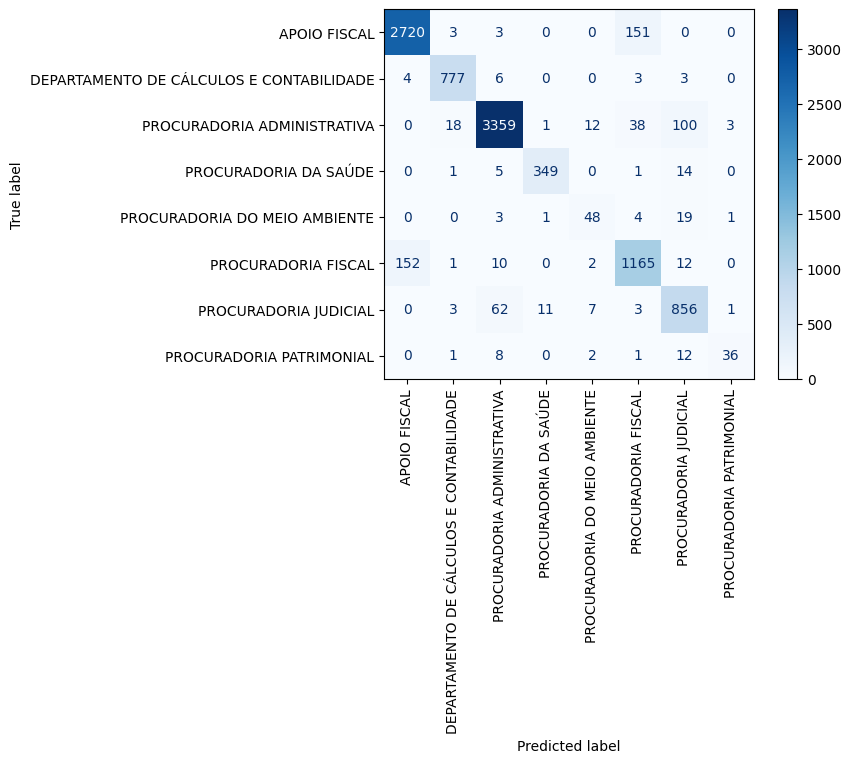

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

print(classification_report(y_true=y_test, y_pred=y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap=plt.cm.Blues,
    xticks_rotation=90
)

plt.show()

## 5.2 - SVM

In [ ]:
from sklearn.svm import SVC

params_search_classificador = {
    'classificador__C': loguniform(1e-3, 1e3),
    'classificador__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'classificador__gamma': loguniform(1e-1, 1e1),
    'classificador__degree': randint(2, 6),
    'classificador__class_weight': ['balanced', None],
    'classificador__tol': loguniform(1e-5, 1e-2)
}

# Juntando os parâmetros de busca
params_search = params_search_transformation | params_search_classificador

# Pipeline
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classificador', SVC())
])

svm_random_search = RandomizedSearchCV(
    estimator=svm_pipeline,
    param_distributions=params_search,
    n_iter=30,
    cv=skf,
    scoring='f1_weighted',
    verbose=3,
    n_jobs=-1
)

svm_random_search.fit(X_train_res, y_train_res)

In [31]:
svm_random_search.best_params_

{'classificador__C': np.float64(4.118460737005642),
 'classificador__class_weight': None,
 'classificador__degree': 3,
 'classificador__gamma': np.float64(0.18866224103627147),
 'classificador__kernel': 'poly',
 'classificador__tol': np.float64(0.00019588114044956047),
 'preprocessor__tfidf__max_features': 2048,
 'preprocessor__tfidf__ngram_range': (1, 2)}

In [25]:
y_pred = svm_random_search.best_estimator_.predict(X_test)

pd.DataFrame(svm_random_search.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classificador__C,param_classificador__class_weight,param_classificador__degree,param_classificador__gamma,param_classificador__kernel,param_classificador__tol,...,param_preprocessor__tfidf__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,403.194391,33.318060,82.485828,5.153770,4.118461,None,3,0.188662,poly,0.000196,...,"(1, 2)","{'classificador__C': 4.118460737005642, 'class...",0.917074,0.912050,0.926118,0.927246,0.915908,0.919679,0.005966,1
1,221.362179,3.922642,58.763013,0.725000,8.236661,None,4,0.160814,poly,0.009159,...,"(1, 1)","{'classificador__C': 8.236661125758612, 'class...",0.913569,0.908425,0.918823,0.921035,0.913466,0.915064,0.004442,2
3,317.419900,12.947559,109.115701,3.276834,7.327991,None,2,5.824734,linear,0.000010,...,"(1, 2)","{'classificador__C': 7.327991027787006, 'class...",0.910428,0.910199,0.916705,0.922362,0.909862,0.913911,0.004930,3
27,425.421718,52.709720,56.518705,9.904783,435.373648,None,5,0.249935,rbf,0.000214,...,"(1, 4)","{'classificador__C': 435.3736482242682, 'class...",0.908149,0.903185,0.919314,0.918719,0.910604,0.911994,0.006215,4
16,778.098984,253.591101,144.107952,71.003666,0.015005,None,4,0.786378,poly,0.002189,...,"(1, 4)","{'classificador__C': 0.015005284741903798, 'cl...",0.909920,0.903430,0.917526,0.917807,0.910126,0.911762,0.005390,5


                                          precision    recall  f1-score   support

                            APOIO FISCAL     0.9479    0.9489    0.9484      2877
DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE     0.9653    0.9811    0.9731       793
             PROCURADORIA ADMINISTRATIVA     0.9732    0.9470    0.9600      3531
                   PROCURADORIA DA SAÚDE     0.9532    0.9351    0.9441       370
           PROCURADORIA DO MEIO AMBIENTE     0.6716    0.5921    0.6294        76
                     PROCURADORIA FISCAL     0.8530    0.8689    0.8608      1342
                   PROCURADORIA JUDICIAL     0.8453    0.9268    0.8842       943
                PROCURADORIA PATRIMONIAL     0.8974    0.5833    0.7071        60

                                accuracy                         0.9325      9992
                               macro avg     0.8884    0.8479    0.8634      9992
                            weighted avg     0.9336    0.9325    0.9326      9992



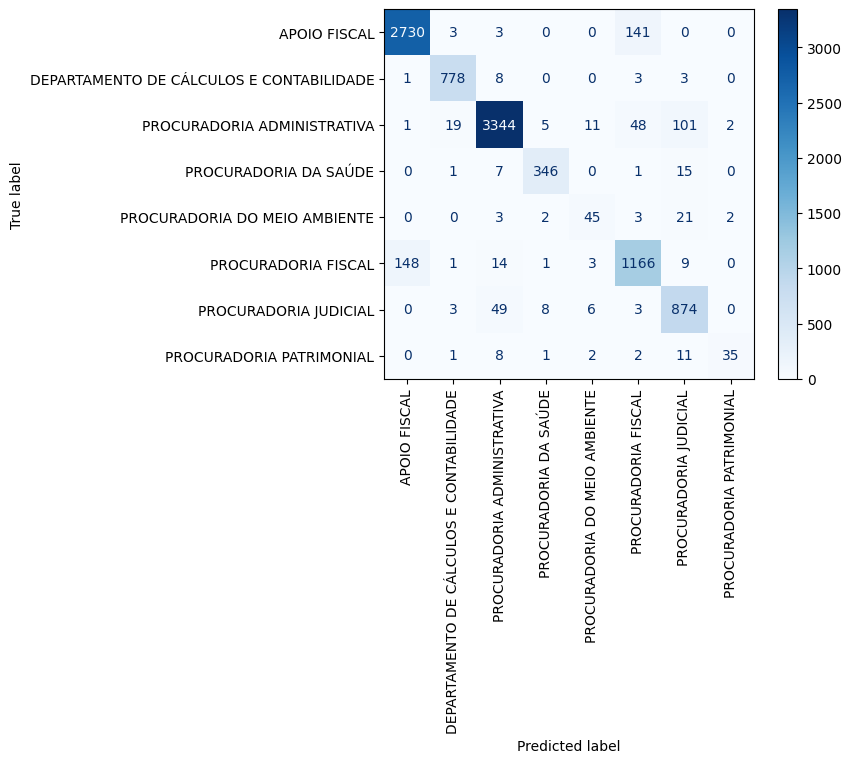

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

print(classification_report(y_true=y_test, y_pred=y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap=plt.cm.Blues,
    xticks_rotation=90
)

plt.show()

## 5.3 - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params_search_classificador = {
    'classificador__n_estimators': randint(50, 300),
    'classificador__max_depth': list(range(10, 101, 10)),
    'classificador__min_samples_split': uniform(0.01, 0.1),
    'classificador__min_samples_leaf': uniform(0.001, 0.05),
    'classificador__max_features': ['sqrt', 'log2', None],
    'classificador__class_weight': ['balanced', 'balanced_subsample', None],
    'classificador__criterion': ['gini', 'entropy', 'log_loss']
}

# Juntando os parâmetros de busca
params_search = params_search_transformation | params_search_classificador

# Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classificador', RandomForestClassifier())
])

rf_random_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=params_search,
    n_iter=30,
    cv=skf,
    scoring='f1_weighted',
    verbose=3,
    n_jobs=-1
)

rf_random_search.fit(X_train_res, y_train_res)

In [32]:
rf_random_search.best_params_

{'classificador__class_weight': 'balanced',
 'classificador__criterion': 'gini',
 'classificador__max_depth': 30,
 'classificador__max_features': None,
 'classificador__min_samples_leaf': np.float64(0.0013359695046429357),
 'classificador__min_samples_split': np.float64(0.029300349839679524),
 'classificador__n_estimators': 165,
 'preprocessor__tfidf__max_features': 2048,
 'preprocessor__tfidf__ngram_range': (1, 3)}

In [28]:
y_pred = rf_random_search.best_estimator_.predict(X_test)

pd.DataFrame(rf_random_search.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classificador__class_weight,param_classificador__criterion,param_classificador__max_depth,param_classificador__max_features,param_classificador__min_samples_leaf,param_classificador__min_samples_split,...,param_preprocessor__tfidf__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,1084.725814,9.426779,6.381017,0.187719,balanced,gini,30,None,0.001336,0.029300,...,"(1, 3)","{'classificador__class_weight': 'balanced', 'c...",0.832255,0.830741,0.842823,0.829239,0.843647,0.835741,0.006198,1
15,1582.784318,33.660379,9.729939,0.851840,None,entropy,10,None,0.006009,0.029958,...,"(1, 4)","{'classificador__class_weight': None, 'classif...",0.787561,0.799107,0.797493,0.798427,0.804681,0.797454,0.005546,2
18,79.605397,3.192581,6.330072,0.297166,balanced_subsample,gini,50,sqrt,0.008324,0.029489,...,"(1, 3)",{'classificador__class_weight': 'balanced_subs...,0.798420,0.790770,0.792691,0.789584,0.801631,0.794619,0.004637,3
5,214.838742,1.135911,6.241399,0.446749,balanced_subsample,gini,30,None,0.008147,0.077200,...,"(1, 3)",{'classificador__class_weight': 'balanced_subs...,0.775147,0.778263,0.795749,0.781441,0.782096,0.782539,0.007054,4
0,684.996907,12.753500,2.128308,0.195357,None,entropy,50,None,0.015344,0.054265,...,"(1, 1)","{'classificador__class_weight': None, 'classif...",0.779303,0.779477,0.780873,0.781621,0.777287,0.779712,0.001490,5


                                          precision    recall  f1-score   support

                            APOIO FISCAL     0.9411    0.8943    0.9171      2877
DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE     0.9730    0.9559    0.9644       793
             PROCURADORIA ADMINISTRATIVA     0.9398    0.7782    0.8514      3531
                   PROCURADORIA DA SAÚDE     0.5944    0.7486    0.6627       370
           PROCURADORIA DO MEIO AMBIENTE     0.0865    0.5921    0.1510        76
                     PROCURADORIA FISCAL     0.7780    0.7966    0.7872      1342
                   PROCURADORIA JUDICIAL     0.7466    0.8218    0.7824       943
                PROCURADORIA PATRIMONIAL     0.2102    0.5500    0.3041        60

                                accuracy                         0.8285      9992
                               macro avg     0.6587    0.7672    0.6775      9992
                            weighted avg     0.8792    0.8285    0.8486      9992



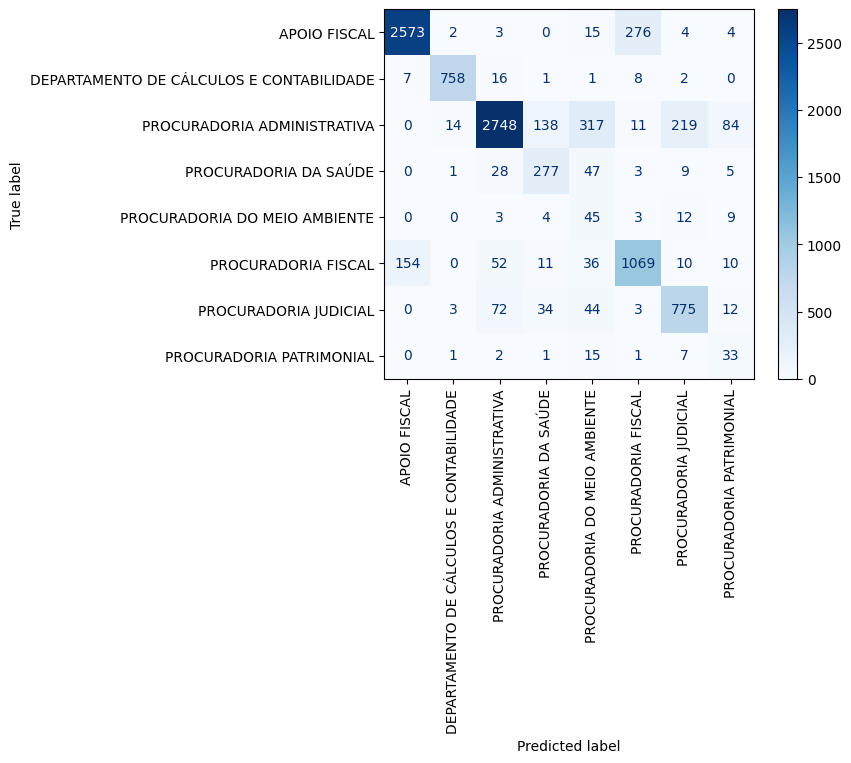

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

print(classification_report(y_true=y_test, y_pred=y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap=plt.cm.Blues,
    xticks_rotation=90
)

plt.show()

# 6. Utilizando melhor classificador testado

O melhor resultado obtido pode ser considerado a Regressão Logísitica com os seguintes parâmetros testados:

* **TFIDF**
    * max_features = 2048
    * ngram_range = (1, 4)

* **Regressão Logísitica**
    * tol = 0.0009893
    * solver = liblinear
    * penalty = l1
    * max_iter = 500
    * class_weight = None
    * C = 1.9582062


In [38]:
clf_final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classificador', LogisticRegression())
])

clf_final_pipeline.set_params(
    preprocessor__tfidf__max_features = 2048,
    preprocessor__tfidf__ngram_range = (1, 4),
    classificador__tol = 0.0009893,
    classificador__solver = 'liblinear',
    classificador__penalty = 'l1',
    classificador__max_iter = 500,
    classificador__class_weight = None,
    classificador__C = 1.9582062 
)

clf_final_pipeline.fit(X_train_res, y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tfidf',
                                                  TfidfVectorizer(max_features=2048,
                                                                  ngram_range=(1,
                                                                               4)),
                                                  'teor_texto'),
                                                 ('onehot_meta',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cod_classe_processual',
                                                   'orgao_julgador']),
                                                 ('assuntos',
                                                  Pipeline(steps=[('split',
                                                                   FunctionTransformer(func=<function split_assuntos at 0x78ca1c07b7e0>)),
                                                                  ('binarizer',
                                                                   MultiLabelBinarizerEncoder())]),
                                                  'assuntos')])),
                ('classificador',
                 LogisticRegression(C=1.9582062, max_iter=500, penalty='l1',
                                    solver='liblinear', tol=0.0009893))])

## 6.1 - Avaliando o melhor modelo

In [39]:
y_pred_test = clf_final_pipeline.predict(X_test)
y_proba_test = clf_final_pipeline.predict_proba(X_test)

                                          precision    recall  f1-score   support

                            APOIO FISCAL    0.94574   0.94508   0.94541      2877
DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE    0.96642   0.97982   0.97307       793
             PROCURADORIA ADMINISTRATIVA    0.97139   0.95185   0.96152      3531
                   PROCURADORIA DA SAÚDE    0.96676   0.94324   0.95486       370
           PROCURADORIA DO MEIO AMBIENTE    0.67606   0.63158   0.65306        76
                     PROCURADORIA FISCAL    0.85223   0.86811   0.86010      1342
                   PROCURADORIA JUDICIAL    0.84501   0.90774   0.87526       943
                PROCURADORIA PATRIMONIAL    0.87805   0.60000   0.71287        60

                                accuracy                        0.93185      9992
                               macro avg    0.88771   0.85343   0.86702      9992
                            weighted avg    0.93270   0.93185   0.93195      9992



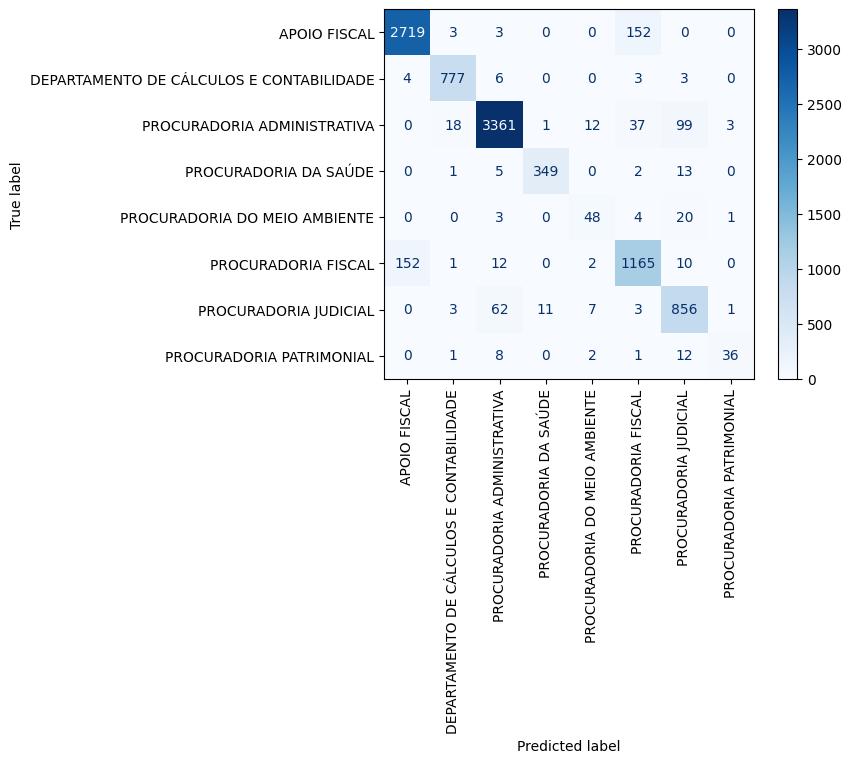

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve, classification_report, precision_recall_curve
import matplotlib.pyplot as plt

print(classification_report(y_true=y_test, y_pred=y_pred_test, digits=5))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_test,
    cmap=plt.cm.Blues,
    xticks_rotation=90
)

plt.show()

In [41]:
# AUC, Curva ROC e Curva Precisão-Recall por classe

roc_auc_curves = []

for i, classe in enumerate(clf_final_pipeline.classes_):
    auc = roc_auc_score(
        y_true=(y_test == classe).astype(int),
        y_score=y_proba_test[:, i]
    )
    roc = roc_curve(
        y_true=(y_test == classe).astype(int),
        y_score=y_proba_test[:, i]
    )
    pr_curve = precision_recall_curve(
        y_true=(y_test == classe).astype(int),
        y_score=y_proba_test[:, i]
    )

    roc_auc_curves.append((classe, auc, roc, pr_curve))

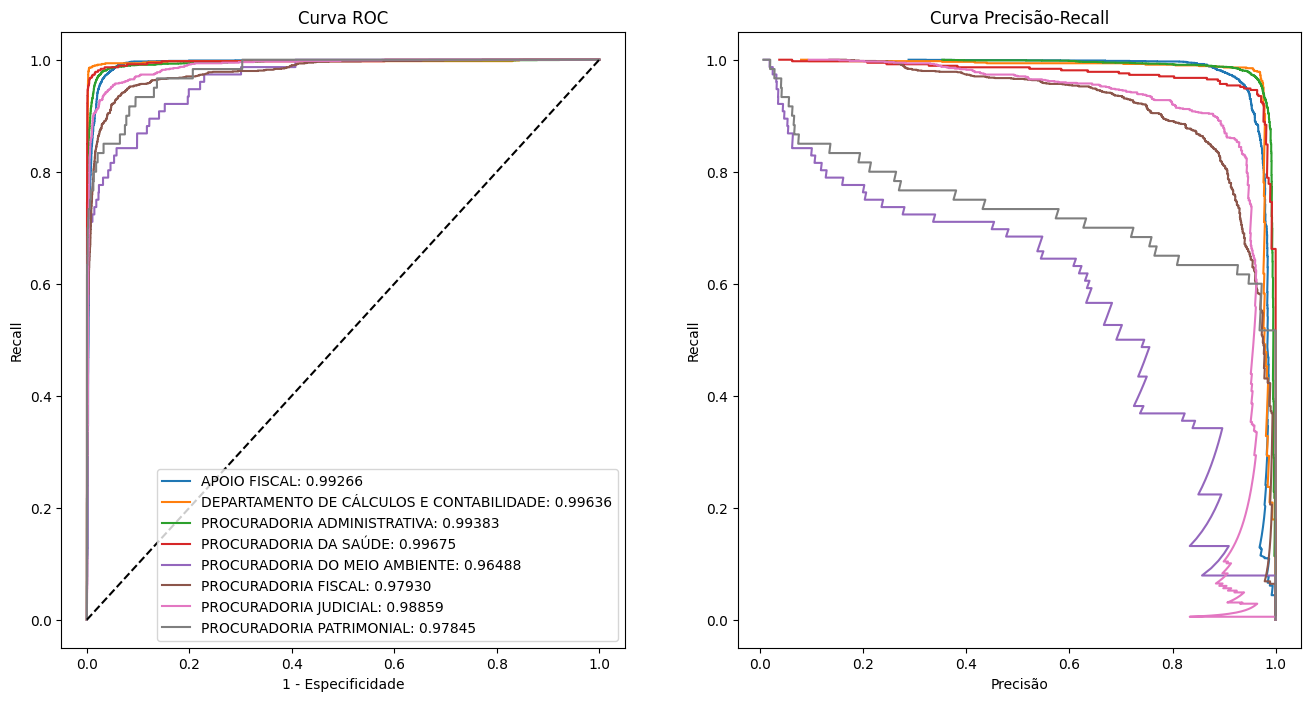

In [42]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

for label, auc_score, roc_curve, pr_curve in roc_auc_curves:
    ax1.plot(roc_curve[0], roc_curve[1], label=f'{label}: {auc_score:.5f}')
    ax2.plot(pr_curve[0], pr_curve[1], label=f'{label}')
ax1.plot([0, 1], [0, 1], color='black', linestyle='dashed')

ax1.set_title("Curva ROC")
ax1.set_xlabel("1 - Especificidade")
ax1.set_ylabel("Recall")

ax2.set_title("Curva Precisão-Recall")
ax2.set_xlabel("Precisão")
ax2.set_ylabel("Recall")

ax1.legend()
plt.show()

In [96]:
import numpy as np

# Considerando um threshold de classificação

threshold = 0.9

index_gt_threshold = np.where(y_proba_test.max(axis=1) > threshold)[0]

y_test_threshold = y_test.iloc[index_gt_threshold]
y_pred_threshold = y_pred_test[index_gt_threshold]

print(f'Considerando um threshold de {threshold} foi classificado {len(y_test_threshold)/len(y_test)*100:.2f}% dos dados de treino')

Considerando um threshold de 0.9 foi classificado 71.52% dos dados de treino


                                          precision    recall  f1-score   support

                            APOIO FISCAL    0.98278   0.98715   0.98496      2023
DEPARTAMENTO DE CÁLCULOS E CONTABILIDADE    0.97587   0.99318   0.98445       733
             PROCURADORIA ADMINISTRATIVA    0.99355   0.98718   0.99036      2497
                   PROCURADORIA DA SAÚDE    0.99267   0.99267   0.99267       273
           PROCURADORIA DO MEIO AMBIENTE    1.00000   0.30000   0.46154        20
                     PROCURADORIA FISCAL    0.96247   0.95324   0.95783       834
                   PROCURADORIA JUDICIAL    0.94751   0.97832   0.96267       738
                PROCURADORIA PATRIMONIAL    1.00000   0.71429   0.83333        28

                                accuracy                        0.98013      7146
                               macro avg    0.98186   0.86325   0.89598      7146
                            weighted avg    0.98031   0.98013   0.97956      7146



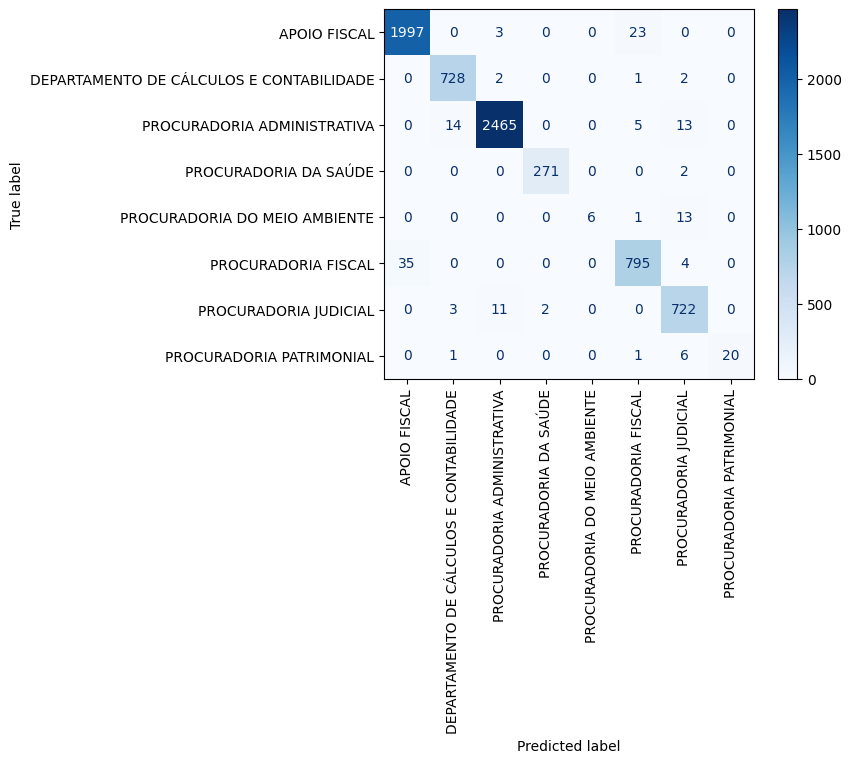

In [97]:
print(classification_report(y_true=y_test_threshold, y_pred=y_pred_threshold, digits=5))

ConfusionMatrixDisplay.from_predictions(
    y_test_threshold,
    y_pred_threshold,
    cmap=plt.cm.Blues,
    xticks_rotation=90
)

plt.show()

In [98]:
import joblib

joblib.dump(clf_final_pipeline, 'clf_setor_destino.pkl')

['clf_setor_destino.pkl']